<a href="https://colab.research.google.com/github/annyfan/550/blob/master/Copy_of_best_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

# Metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import sys

In [3]:
!wget "https://www.dropbox.com/s/qvo45vf0kc7j41d/ift6758-a20.zip?dl=0" -O data.zip
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_profile_images/profile_images_train/9O6PO4HFOCQ99IHF.png  
  inflating: train_profile_images/profile_images_train/9OGBOKM836P9MHMF.png  
  inflating: train_profile_images/profile_images_train/9OI7OC6A872QJPSH.png  
  inflating: train_profile_images/profile_images_train/9OI8I76J9K28EKQH.png  
  inflating: train_profile_images/profile_images_train/9OPJABRP2617QS4D.png  
  inflating: train_profile_images/profile_images_train/9OT5062HK84PG4N3.png  
  inflating: train_profile_images/profile_images_train/9P0LPSH2KE7K544O.png  
  inflating: train_profile_images/profile_images_train/9P0NH81RQ8CH2ML4.png  
  inflating: train_profile_images/profile_images_train/9P38G80NSFA7KDK6.png  
  inflating: train_profile_images/profile_images_train/9P4FRH3ICREEQL1D.png  
  inflating: train_profile_images/profile_images_train/9PAC0AE37SGQATON.png  
  inflating: train_profile_images/profile_images_train/9PFJD24I7OT7LRS0.png  
  inflating: 

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,NaN,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,mumbai,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
2,JS49LP5P72RI1OQB,d_uiMm,NaN,Set,Not verified,1fc2de,efefef,1fc2de,False,-18000.0,NYC + 70 Countries Worldwide,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,"Indianapolis, In",Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
4,CRSEMK4QER6LDJSA,hRR1sDGlz5,https://blob/v/Szeo.h4/.com,Set,Not verified,58424d,f7f7f7,000000,False,-18000.0,"777 Beach Blvd. Biloxi, MS",Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078


In [11]:
# Set random seeds (for reproducibility requirement)
os.environ['PYTHONHASHSEED']=str(1)
np.random.seed(67)
random.seed(67)

In [ ]:
train_df.isnull().sum()

Id                                                0
User Name                                         0
Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Profile Text Color                               66
Profile Page Color                               78
Profile Theme Color                              72
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location                                       1461
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Cate

In [ ]:
test_df.isnull().sum()

Id                                                0
User Name                                         0
Personal URL                                   1462
Profile Cover Image Status                       20
Profile Verification Status                       0
Profile Text Color                               36
Profile Page Color                               27
Profile Theme Color                              23
Is Profile View Size Customized?                  0
UTC Offset                                      148
Location                                        476
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  148
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Cate

In [ ]:
train_df['Profile Creation Timestamp'].dtype

dtype('O')

In [5]:
# get the number of seconds to the unix epoch start.
df_unix_sec = pd.to_datetime(train_df['Profile Creation Timestamp']).astype(int) / (10**9*60*60*24)
pd.to_datetime(df_unix_sec)

0      1970-01-01 00:00:00.000014210
1      1970-01-01 00:00:00.000014624
2      1970-01-01 00:00:00.000014519
3      1970-01-01 00:00:00.000014294
4      1970-01-01 00:00:00.000014334
                    ...             
7495   1970-01-01 00:00:00.000014994
7496   1970-01-01 00:00:00.000015049
7497   1970-01-01 00:00:00.000014317
7498   1970-01-01 00:00:00.000014450
7499   1970-01-01 00:00:00.000014964
Name: Profile Creation Timestamp, Length: 7500, dtype: datetime64[ns]

In [6]:
days_since_creation = (pd.to_datetime('Tue Dec 01 00:00:00 +0000 2020') - pd.to_datetime(train_df['Profile Creation Timestamp'])).astype('timedelta64[D]')

In [7]:
days_since_creation

0       4386.0
1       3972.0
2       4077.0
3       4302.0
4       4262.0
         ...  
7495    3602.0
7496    3547.0
7497    4279.0
7498    4146.0
7499    3632.0
Name: Profile Creation Timestamp, Length: 7500, dtype: float64

In [8]:
df_unix_day = pd.to_datetime(train_df['Profile Creation Timestamp']).astype(int) / (10**9*60*60*24)
df_unix_day - df_unix_day.min()

0        765.078148
1       1179.602998
2       1074.696285
3        849.461748
4        889.413484
           ...     
7495    1549.701308
7496    1604.012755
7497     872.531701
7498    1005.524977
7499    1519.273032
Name: Profile Creation Timestamp, Length: 7500, dtype: float64

In [9]:
pd.DatetimeIndex(test_df['Profile Creation Timestamp']).year.min()

2007

In [15]:
!pip install emoji

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49715 sha256=0623a731353c2fe6422e833cf69ae7cb895061610feb12a584db02d1b799401b
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [16]:
from emoji import UNICODE_EMOJI

def count_emojis(s):
    count = 0
    for emoji in UNICODE_EMOJI:
        count += s.count(emoji)
    return count

In [17]:
train_df[train_df['Location'].apply(lambda x: count_emojis(str(x)))>0]

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
87,2L9J60KAIP2049Q5,OPxR7gDhJefTK,NaN,Set,Verified,2fc2ef,252429,1a1b1f,False,-18000.0,NYC & the rest of the world ✈️,Enabled,en,Thu Jan 06 19:56:45 +0000 2011,Central Time (US & Canada),312455,333,10130,252,unknown,13.846,10.4373,2L9J60KAIP2049Q5.png,32845
178,JI0OGG3SM6PMEAGH,B5WPt,NaN,Not set,Verified,211b1c,ddffcc,211b1c,False,-18000.0,"Living, Loving, and Laughing❤️",Disabled,en,Sat Apr 04 23:53:24 +0000 2009,Quito,10868693,55,10157,17693,unknown,27.396,2.0480,JI0OGG3SM6PMEAGH.png,469
757,8C9SE1R2L139BSFQ,qqAEqO,NaN,Not set,Verified,e8000d,bcc2c3,0051ba,False,-18000.0,Lawrence❤️Kansas,Enabled,en,Thu Apr 16 16:23:03 +0000 2009,Central Time (US & Canada),74331,502,29731,940,government,27.924,3.4291,8C9SE1R2L139BSFQ.png,41672
887,DNKR8C5EHN3KAB0T,iBaviV1tgW8KIt,NaN,Set,Not verified,000000,000000,ff1199,False,-25200.0,LTW-Network™,Enabled,en,Mon Oct 25 09:21:42 +0000 2010,Pacific Time (US & Canada),3654074,100,35221,5235,business,27.082,1.8661,DNKR8C5EHN3KAB0T.png,34
928,OQOIDRL5CIT7DNKG,I5eg1ere_8r4z,NaN,Set,Verified,009999,efefef,131516,False,-25200.0,LA ✈ UK,Enabled,en,Fri Nov 12 22:48:25 +0000 2010,Pacific Time (US & Canada),111699,4736,39834,103,business,36.261,3.2292,OQOIDRL5CIT7DNKG.png,53510
985,F5JRC675BJF6PTPK,C7U4t1MNB,NaN,Set,Not verified,cc3366,e6f6f9,dbe9ed,False,-14400.0,877-KARS4KIDS 🎶,Enabled,en,Tue Jun 09 17:40:12 +0000 2009,Eastern Time (US & Canada),5152,384,6460,27,,22.519,7.6970,F5JRC675BJF6PTPK.png,2749
1056,8PN6P8JCGGAGLI0L,kfO0sTeA,NaN,Set,Verified,009999,efefef,131516,False,NaN,Denmark ✈ Los Angeles,??,en,Sat Dec 22 19:49:11 +0000 2012,NaN,1353798,774,18268,1711,unknown,11.334,4.7631,8PN6P8JCGGAGLI0L.png,11162
1363,C57ON0ALPSNOR65E,77Ox8lg7qenl,NaN,Set,Not verified,1da1f2,ddeef6,c0deed,True,-10800.0,♻️,Disabled,es,Wed Jun 20 15:08:35 +0000 2012,Buenos Aires,1221067,153,9184,560,unknown,16.608,1.4631,C57ON0ALPSNOR65E.png,1935
1779,5D4NB617DQF5JOEL,EFi7QFRpt0eIlt,NaN,Set,Verified,1da1f2,ddeef6,c0deed,True,NaN,STL✈️Dallas,Enabled,en,Tue Mar 13 00:13:39 +0000 2012,NaN,2007961,1800,11575,1526,government,33.823,1.3171,5D4NB617DQF5JOEL.png,3070
2125,MTBDQF69LKPDARP5,oIJQVhQDtLX,NaN,Set,Verified,0084b4,ddeef6,022330,False,NaN,LA ✈️ NYC,Enabled,en,Mon Jan 21 16:24:58 +0000 2013,NaN,94402,737,3250,114,government,28.950,2.6214,MTBDQF69LKPDARP5.png,9535


In [18]:
train_df['Location'].fillna('').apply(lambda x: len(str(x)))

0        0
1        6
2       28
3       16
4       26
        ..
7495     0
7496    14
7497    17
7498     6
7499    10
Name: Location, Length: 7500, dtype: int64

In [19]:
train_df[train_df['Location'].fillna('').str.contains(pat = '#', regex = True)]
train_df[train_df['Location'].fillna('').str.contains(pat = '#', regex = True)]
train_df[train_df['Location'].fillna('').str.contains(pat = '\d', regex = True)==False]

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,NaN,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,mumbai,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,"Indianapolis, In",Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
5,0FEKBQ59AF1LQKJP,dgYvLYV,https://blob/132hwfh8ee.com,Set,Verified,007cc2,ddeef6,3493d0,False,-14400.0,NaN,Enabled,en,Wed Sep 30 17:40:18 +0000 2009,Eastern Time (US & Canada),51186,235,15881,468,celebrity,31.602,1.0216,0FEKBQ59AF1LQKJP.png,169
6,G47D4QN50M6JKLOO,KQni7ejFw_c,NaN,Set,Verified,3b94d9,eed7ad,131516,False,-14400.0,"Bronx, New York",Enabled,en,Wed Aug 12 22:38:20 +0000 2009,Eastern Time (US & Canada),7278163,330,14552,5702,celebrity,34.285,15.0537,G47D4QN50M6JKLOO.png,1035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,KP5DR7CTN8CNLG8P,OkKZVeUwhipjmao,NaN,Not set,Verified,490707,ddeef6,000000,False,-25200.0,NaN,Disabled,en,Thu Jan 20 20:22:20 +0000 2011,Pacific Time (US & Canada),6086,76,985,56,unknown,24.792,8.1106,KP5DR7CTN8CNLG8P.png,1373
7496,SGNF9P1P3922T34T,TPgyIiQieSq,NaN,Not set,Not verified,000000,ffffff,ffffff,False,-10800.0,Belo Horizonte,Enabled,pt,Wed Mar 16 03:50:49 +0000 2011,America/Sao_Paulo,280190,38604,20652,172,unknown,26.006,0.8956,SGNF9P1P3922T34T.png,1407
7497,O00FTLDT6O803LD0,piL8bSOPoaW4,NaN,Set,Verified,0084b4,ddffcc,00133b,False,7200.0,"Stockholm, Sweden",enabled,en,Sat Mar 14 16:18:06 +0000 2009,Stockholm,21647,49,2348,271,,15.030,2.8867,O00FTLDT6O803LD0.png,1235
7498,9F04JLR9JGT8R3EJ,buidBJStq59D,NaN,Set,Not verified,91d2fa,ddffcc,fa743e,False,-10800.0,Brasil,enabled,pt,Sat Jul 25 16:08:25 +0000 2009,Brasilia,89005,256,73830,346,business,11.948,1.7756,9F04JLR9JGT8R3EJ.png,1105


In [20]:
train_df.groupby(['Location'])['Id'].count().sort_values()

Location
 - Paris -                          1
Paris Expo Porte de Versailles      1
Paris, Toulouse, Kourou             1
Park City, UT                       1
Parma, Italy                        1
                                 ... 
London                             68
Brasil                             68
India                              74
Los Angeles, CA                    82
New York, NY                      119
Name: Id, Length: 3035, dtype: int64

In [21]:
loc_test = train_df.replace(['Chicago, IL', 'Cairo, Egypt', 'Jakarta, Indonesia', 'Las Vegas', 'London, England',
                              'London, UK','California, USA','Hollywood, CA', 'Los Angeles, CA','Los Angeles', 'Los Angeles, California','LA','San Francisco, CA','San Francisco','México','Ciudad de México','Sydney, Australia',
                              'Caracas, Venezuela','Buenos Aires, Argentina','São Paulo', 'São Paulo, Brasil', 'Brazil','Rio de Janeiro, Brasil','São Paulo - Brasil',
                             'Rio de Janeiro','Santiago, Chile','Mumbai', 'Mumbai, India','New Delhi, India','İstanbul','istanbul','İstanbul, Türkiye','Türkiye',
                              'Istanbul','Paris', 'Paris, France','NYC','New York City', 'New York, New York','New York, NY','Barcelona','Madrid','Madrid, España', 'Madrid, Spain',
                             'Washington, D.C.','Everywhere','Global','Earth','Manila, Philippines','UK','England', 'England, United Kingdom','USA','Bogotá, Colombia',
                            'Dubai, UAE', 'Dubai, United Arab Emirates','Dubai','Italia','Milano','Amsterdam','Lima, Perú','Toronto','Kingdom of Saudi Arabia','Tokyo', 'Tokyo, Japan',], 
                             ['Chicago', 'Egypt', 'Jakarta', 'Las Vegas, NV', 'London', 'London','California','California','California','California','California','California','California','California','Mexico','Mexico',
                             'Australia','Venezuela','Argentina','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Chile','India','India','India','Turkey','Turkey',
                              'Turkey','Turkey','Turkey','France','France','New York','New York','New York','New York','España','España','España','España','Washington, DC',
                             'Worldwide','Worldwide','Worldwide','Philippines','United Kingdom','United Kingdom','United Kingdom','United States','Colombia','United Arab Emirates','United Arab Emirates','United Arab Emirates',
                             'Italy','Italy','Nederland','Perú','Canada','Saudi Arabia', 'Japan','Japan',]).groupby(['Location'])['Id','Location'].count()
loc_test[loc_test['Id']>5].index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


Index(['Argentina', 'Atlanta, GA', 'Austin, TX', 'Australia', 'Boston, MA',
       'Brasil', 'California', 'Canada', 'Charlotte, NC', 'Chicago', 'Chile',
       'Colombia', 'Dallas, TX', 'Detroit, MI', 'Doha, Qatar',
       'Dublin, Ireland', 'Ecuador', 'Egypt', 'España', 'France', 'Germany',
       'Hong Kong', 'Houston, TX', 'India', 'Indianapolis, IN', 'Indonesia',
       'Italy', 'Jakarta', 'Japan', 'Kuwait', 'Las Vegas, NV', 'London',
       'Malaysia', 'Mexico', 'Miami, FL', 'Minneapolis, MN', 'Nashville, TN',
       'Nederland', 'New Orleans, LA', 'New York', 'New Zealand', 'Nigeria',
       'North America', 'Orlando, FL', 'Oxford, MS', 'Pakistan', 'Panamá',
       'Perú', 'Philadelphia, PA', 'Philippines', 'Pittsburgh, PA',
       'Portland, OR', 'Redmond, WA', 'Santa Monica, CA', 'Saudi Arabia',
       'Seattle, WA', 'Seoul, Korea', 'Singapore', 'South Africa',
       'Stanford, CA', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Venezuela', 'Wash

In [24]:
values = pd.Series(["a","b","a","b","c","d","e","a"])
counts = pd.value_counts(values)
mask = values.isin(counts[counts > 1].index)
print( pd.get_dummies(values[mask])
values['~mask'] = "-"
print pd.get_dummies(values)

SyntaxError: ignored

In [25]:
train_df['Location'].isin(['Argentina', 'Atlanta, GA', 'Austin, TX', 'Australia', 'Boston, MA',
       'Brasil', 'California', 'Canada', 'Charlotte, NC', 'Chicago', 'Chile',
       'Colombia', 'Dallas, TX', 'Detroit, MI', 'Doha, Qatar',
       'Dublin, Ireland', 'Ecuador', 'Egypt', 'España', 'France', 'Germany',
       'Hong Kong', 'Houston, TX', 'India', 'Indianapolis, IN', 'Indonesia',
       'Italy', 'Jakarta', 'Japan', 'Kuwait', 'Las Vegas, NV', 'London',
       'Malaysia', 'Mexico', 'Miami, FL', 'Minneapolis, MN', 'Nashville, TN',
       'Nederland', 'New Orleans, LA', 'New York', 'New Zealand', 'Nigeria',
       'North America', 'Orlando, FL', 'Oxford, MS', 'Pakistan', 'Panamá',
       'Perú', 'Philadelphia, PA', 'Philippines', 'Pittsburgh, PA',
       'Portland, OR', 'Redmond, WA', 'Santa Monica, CA', 'Saudi Arabia',
       'Seattle, WA', 'Seoul, Korea', 'Singapore', 'South Africa',
       'Stanford, CA', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Venezuela', 'Washington, DC', 'Worldwide', 'Москва',
       'المملكة العربية السعودية'])

0       False
1       False
2       False
3       False
4       False
        ...  
7495    False
7496    False
7497    False
7498     True
7499    False
Name: Location, Length: 7500, dtype: bool

In [26]:
lang_test= train_df.groupby(['User Language'])['Id','User Language'].count()
lang_test[lang_test['Id']>20].index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Index(['ar', 'de', 'en', 'en-gb', 'es', 'fr', 'it', 'ja', 'ko', 'nl', 'pt',
       'ru', 'tr'],
      dtype='object', name='User Language')

In [27]:
ptc_test = train_df.groupby(['Profile Text Color'])['Id', 'Profile Text Color'].count()
ptc_test[ptc_test['Id']>50].index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Index(['000000', '0084b4', '009999', '0099b9', '1b95e0', '1da1f2', '2fc2ef',
       '3b94d9', '4a913c', '990000', 'abb8c2', 'cc3366', 'dd2e44', 'e81c4f',
       'ff0000', 'ff691f'],
      dtype='object', name='Profile Text Color')

In [28]:
ptc_test = train_df.groupby(['Profile Page Color'])['Id', 'Profile Page Color'].count()
ptc_test[ptc_test['Id']>50].index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Index(['000000', '252429', '7ac3ee', '95e8ec', 'c0dfec', 'ddeef6', 'ddffcc',
       'e3e2de', 'e6f6f9', 'efefef', 'f3f3f3', 'f6f6f6', 'ffffff'],
      dtype='object', name='Profile Page Color')

In [29]:
ppc_test = train_df.groupby(['Profile Theme Color'])['Id', 'Profile Theme Color'].count()
ppc_test[ppc_test['Id']>50].index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Index(['000000', '0099b9', '022330', '131516', '1a1b1f', '9ae4e8', 'c0deed',
       'dbe9ed', 'ebebeb', 'ffffff'],
      dtype='object', name='Profile Theme Color')

In [30]:
tz_test = train_df.groupby(['User Time Zone'])['Id', 'User Time Zone'].count()
tz_test[tz_test['Id']>50].index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Index(['Alaska', 'Amsterdam', 'Arizona', 'Athens', 'Atlantic Time (Canada)',
       'Berlin', 'Bern', 'Bogota', 'Brasilia', 'Buenos Aires', 'Caracas',
       'Central Time (US & Canada)', 'Eastern Time (US & Canada)', 'Greenland',
       'Hawaii', 'Istanbul', 'Jakarta', 'London', 'Madrid', 'Mexico City',
       'Mountain Time (US & Canada)', 'Mumbai', 'New Delhi',
       'Pacific Time (US & Canada)', 'Paris', 'Quito', 'Riyadh', 'Rome',
       'Santiago', 'Tokyo'],
      dtype='object', name='User Time Zone')

In [31]:
train_df['profile_colors'] = train_df[['Profile Text Color','Profile Page Color', 'Profile Theme Color']].fillna('unknown').values.tolist()
train_df['profile_colors'].apply(lambda x: len(set(x)))


0       3
1       3
2       2
3       3
4       3
       ..
7495    3
7496    2
7497    3
7498    3
7499    3
Name: profile_colors, Length: 7500, dtype: int64

In [33]:
train_df.groupby(['User Time Zone'])['Id'].count()

User Time Zone
Abu Dhabi              33
Adelaide                8
Africa/Johannesburg     2
Alaska                 60
Almaty                  2
                       ..
Warsaw                 17
Wellington              8
West Central Africa    16
Yerevan                 6
Zagreb                  3
Name: Id, Length: 145, dtype: int64

In [34]:
column_mean_avg_clicks = train_df['Avg Daily Profile Clicks'].mean()   
column_mean_avg_visits = train_df['Avg Daily Profile Visit Duration in seconds'].mean()

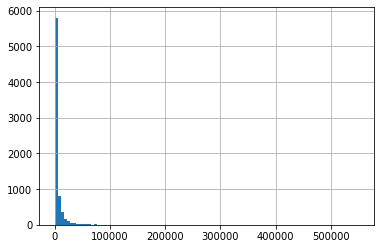

In [35]:
train_df['Num of Profile Likes'].hist(bins=100)

<AxesSubplot:>

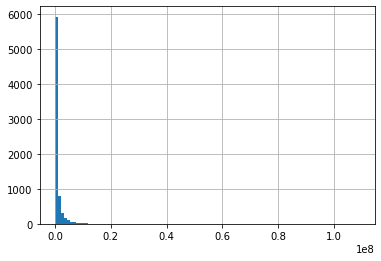

In [ ]:
train_df['Num of Followers'].hist(bins=100)

<AxesSubplot:>

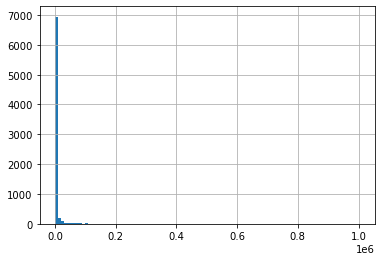

In [ ]:
train_df['Num of People Following'].hist(bins=100)

<AxesSubplot:>

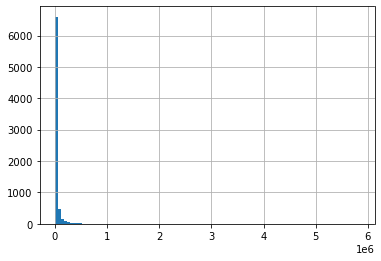

In [ ]:
train_df['Num of Status Updates'].hist(bins=100)

<AxesSubplot:>

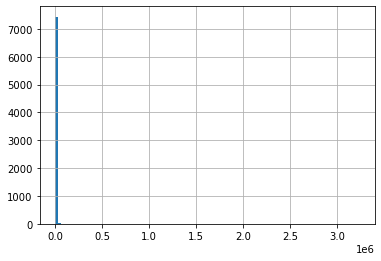

In [ ]:
train_df['Num of Direct Messages'].hist(bins=100)

<AxesSubplot:>

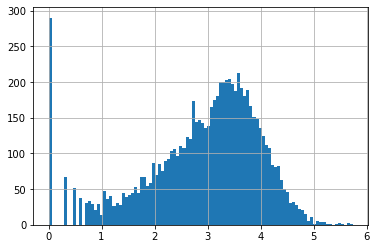

In [ ]:
log_num_likes = np.log10(1 + train_df['Num of Profile Likes'])
log_num_likes.hist(bins=100)

<AxesSubplot:>

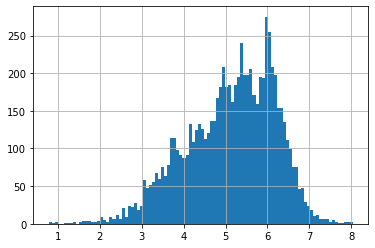

In [ ]:
log_num_likes = np.log10(1 + train_df['Num of Followers'])
log_num_likes.hist(bins=100)

<AxesSubplot:>

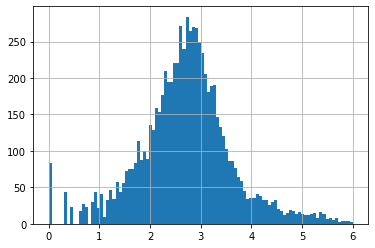

In [ ]:
log_num_likes = np.log10(1 + train_df['Num of People Following'])
log_num_likes.hist(bins=100)

<AxesSubplot:>

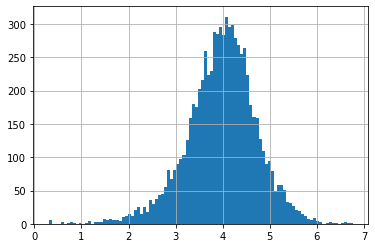

In [ ]:
log_num_likes = np.log10(1 + train_df['Num of Status Updates'])
log_num_likes.hist(bins=100)

<AxesSubplot:>

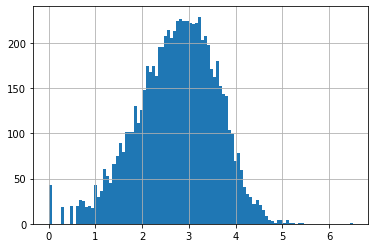

In [ ]:
log_num_likes = np.log10(1 + train_df['Num of Direct Messages'])
log_num_likes.hist(bins=100)

In [36]:
#Imports

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (32, 32, 3)


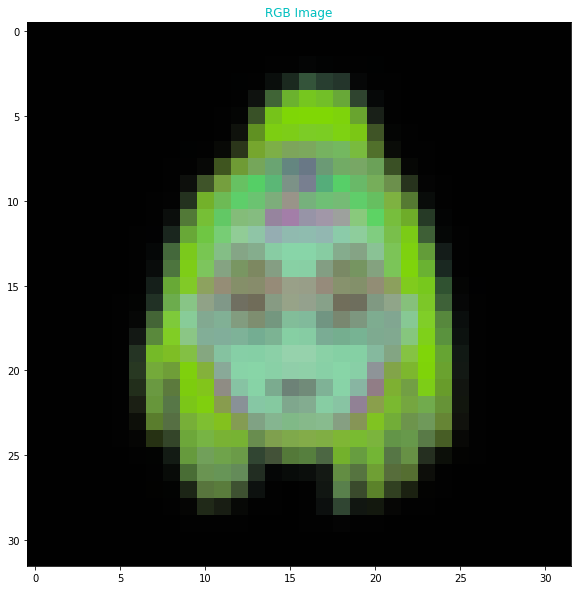

In [40]:
img_train_path = '/content/train_profile_images/profile_images_train/'
TestImgRGB = cv2.imread(img_train_path+'001MIONMBAF4B471.png',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(TestImgRGB))
print('Shape/Size of RGB Img:', TestImgRGB.shape)

plt.figure(figsize=(10,10))
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(TestImgRGB,cv2.COLOR_BGR2RGB))
plt.title('RGB Image',color='c')

plt.show()

In [41]:
img_name = []
max_pixel = []
min_pixel = []
mean_pixel = []
n_bright_pixel = []
n_dark_pixel = []
n_color_pixel = []
r_mean_pixel = []
g_mean_pixel = []
b_mean_pixel = []
r_central_pixel = []
g_central_pixel = []
b_central_pixel = []

for filename in os.listdir(img_train_path):

    img_name.append(filename)
    img = np.array(cv2.imread(img_train_path+filename,cv2.IMREAD_UNCHANGED))
    max_pixel.append(img.max())
    min_pixel.append(img.min())
    mean_pixel.append(img.mean())
    n_bright_pixel.append(np.sum(img == img.max()))
    n_dark_pixel.append(np.sum(img == img.min()))
    n_color_pixel.append(np.sum(img > img.min()))
    r_mean_pixel.append(img[:,:,0].mean())
    g_mean_pixel.append(img[:,:,1].mean())
    b_mean_pixel.append(img[:,:,2].mean())
    r_central_pixel.append(img[16,16,0])
    g_central_pixel.append(img[16,16,1])
    b_central_pixel.append(img[16,16,2])

# dictionary of lists  
img_dict = {'Profile Image': img_name, 'max_pixel': max_pixel,
                'min_pixel': min_pixel,'mean_pixel': mean_pixel,'n_bright_pixel': n_bright_pixel,'n_dark_pixel': n_dark_pixel,
               'n_color_pixel': n_color_pixel,'r_mean_pixel': r_mean_pixel,'g_mean_pixel': g_mean_pixel,'b_mean_pixel': b_mean_pixel,'max_pixel': max_pixel,
               'r_central_pixel': r_central_pixel,'g_central_pixel': g_central_pixel,'b_central_pixel': b_central_pixel}  
    
img_df = pd.DataFrame(img_dict) 
   
img_df

,Profile Image,max_pixel,min_pixel,mean_pixel,n_bright_pixel,n_dark_pixel,n_color_pixel,r_mean_pixel,g_mean_pixel,b_mean_pixel,r_central_pixel,g_central_pixel,b_central_pixel
0,29KKK5HDS9ES6M4N.png,233,1,27.904297,1,1708,1364,26.093750,26.625000,30.994141,35,52,176
1,OAM8KJSADJI6RGDP.png,242,1,35.864258,1,1659,1413,33.880859,49.113281,24.598633,123,106,45
2,9HBQNHS2CS9ROS7L.png,240,1,34.337240,1,1620,1452,36.479492,28.281250,38.250977,161,56,70
3,BL5SDBC40A93K6GQ.png,230,1,32.836589,1,1989,1083,35.476562,28.265625,34.767578,191,87,152
4,R7JF67EI1R9G2AT4.png,221,1,39.825846,3,1828,1244,45.420898,41.461914,32.594727,206,193,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,A6IJQ0G3D06H9N29.png,249,0,35.821289,2,1678,1394,47.845703,40.458008,19.160156,53,155,59
7496,9F04JLR9JGT8R3EJ.png,208,0,31.109049,4,1776,1296,34.972656,33.878906,24.475586,122,167,69
7497,NCB0GTMJB9EEPM3Q.png,243,1,48.188477,2,1625,1447,52.517578,51.749023,40.298828,149,153,145
7498,B98HB2JRFFBFBAMM.png,214,1,31.282227,6,1951,1121,30.334961,27.569336,35.942383,156,125,211


In [42]:
max_pixel.shape

AttributeError: ignored

In [43]:
test_f = []
for filename in os.listdir(img_train_path):
    test_f.append(filename)
test_f

['29KKK5HDS9ES6M4N.png',
 'OAM8KJSADJI6RGDP.png',
 '9HBQNHS2CS9ROS7L.png',
 'BL5SDBC40A93K6GQ.png',
 'R7JF67EI1R9G2AT4.png',
 'BLPR7D88TO9CHKTJ.png',
 'PEFEK47P0PLH5I22.png',
 '0S7SII5P3RP8TG7J.png',
 'L5BAK1DD3SRKS3OL.png',
 'SCODMIP6DJ0KN7D7.png',
 'PGKFBC1CJEJM8ICE.png',
 '6K5EOF72M3JDSGLK.png',
 'IDRC2LO7I8JM82CK.png',
 'G5LHMNH98K66BFSN.png',
 'OP4QN4ACMI9PHMFB.png',
 'FQ0199JTBHOKPFEI.png',
 'JJBH8QOBKOECM5NR.png',
 'L74SHOTRM4O7B5QP.png',
 'PDQHI8FKT3LRKRJR.png',
 '818NPEB93R1TKJAO.png',
 '61PPT5RAG7S8MKK5.png',
 'KFMSQHE9HP5S0C2A.png',
 '97KEBT0PLHA71H1D.png',
 '3JIE733GDRGL245I.png',
 'T3IHRGRM724LQT3M.png',
 'OH24IDLL6476F5EI.png',
 'NM3IQKBF2390D0P9.png',
 'KIGJM6LB1QA8DJQR.png',
 'D3IJ8GGG7T65G3CS.png',
 'M6M3JLNPH64MTK73.png',
 'N1FHPC85G9M3KHQC.png',
 'L1JMEG4GOJ91CMRG.png',
 'F4FC0PIGTLLO8CLQ.png',
 '6QCSN29B84ITRRDN.png',
 'H2G36OG5OH0OL523.png',
 'ON4MSL10OB4RQGGP.png',
 '8FLCKTK8LM3IK1QF.png',
 'LKIAH022KTK4DRQR.png',
 'QA5G1SRH669CC61P.png',
 'LH572DH6RJRSEOGB.png',


In [44]:
img = np.array(TestImgRGB)
max_pixel = img.max()
min_pixel = img.min()
mean_pixel = img.mean()
n_bright_pixel = np.sum(img == max_pixel)
n_dark_pixel = np.sum(img == min_pixel)
n_color_pixel = np.sum(img > min_pixel)
r_mean_pixel = img[:,:,0].mean()
g_mean_pixel = img[:,:,1].mean()
b_mean_pixel = img[:,:,2].mean()
r_central_pixel = img[16,16,0]
g_central_pixel = img[16,16,1]
b_central_pixel = img[16,16,2]

In [45]:
np.sum(img > img.min())

1473

In [46]:
img[:,:,2].mean()

40.4736328125

In [47]:
img_train_path = '/content/train_profile_images/profile_images_train/'

In [48]:
# Pre-processing
def pre_process(data):
  
  #data = data.merge(pd.get_dummies(data['Pclass'], prefix='Pclass'), left_index=True, right_index=True)

  data['user_name_len'] = data['User Name'].fillna('').apply(lambda x: len(str(x)))
  data['url_len'] = data['Personal URL'].fillna('').apply(lambda x: len(str(x)))
  
  data.loc[data['Personal URL'].notnull(), 'url_given']=1
  data.loc[data['Personal URL'].isnull(), 'url_given']=0
    
  data.loc[data['Is Profile View Size Customized?']==True, 'profile_customized']=1
  data.loc[data['Is Profile View Size Customized?']==False, 'profile_customized']=0
    
  data.loc[data['UTC Offset'].notnull(), 'offset_given']=1
  data.loc[data['UTC Offset'].isnull(), 'offset_given']=0
    
  data.loc[data['Location'].notnull(), 'loc_given']=1
  data.loc[data['Location'].isnull(), 'loc_given']=0
    
  data['Location Public Visibility'] = data['Location Public Visibility'].replace(['Enabled', 'Disabled', '??'], ['enabled', 'disabled', 'unknown'])

  data['loc_len'] = data['Location'].fillna('').apply(lambda x: len(str(x)))
  
  '''
    data.loc[data['Location'].notnull(), 'loc_given']=1
  data.loc[data['Location'].isnull(), 'loc_given']=0
    
  data.loc[data['Location'].fillna('').str.contains(pat = '#', regex = True), 'loc_contains_hashtag']=1
  data.loc[data['Location'].fillna('').str.contains(pat = '#', regex = True)==False, 'loc_contains_hashtag']=0
  data.loc[data['Location'].fillna('').str.contains(pat = '@', regex = True), 'loc_contains_email']=1
  data.loc[data['Location'].fillna('').str.contains(pat = '@', regex = True)==False, 'loc_contains_email']=0
  data.loc[data['Location'].fillna('').str.contains(pat = '\d', regex = True), 'loc_contains_digit']=1
  data.loc[data['Location'].fillna('').str.contains(pat = '\d', regex = True)==False, 'loc_contains_digit']=0
    
  data['Location']=data.fillna('unknown').replace(['Chicago, IL', 'Cairo, Egypt', 'Jakarta, Indonesia', 'Las Vegas', 'London, England',
                              'London, UK','California, USA','Hollywood, CA', 'Los Angeles, CA','Los Angeles', 'Los Angeles, California','LA','San Francisco, CA','San Francisco','México','Ciudad de México','Sydney, Australia',
                              'Caracas, Venezuela','Buenos Aires, Argentina','São Paulo', 'São Paulo, Brasil', 'Brazil','Rio de Janeiro, Brasil','São Paulo - Brasil',
                             'Rio de Janeiro','Santiago, Chile','Mumbai', 'Mumbai, India','New Delhi, India','İstanbul','istanbul','İstanbul, Türkiye','Türkiye',
                              'Istanbul','Paris', 'Paris, France','NYC','New York City', 'New York, New York','New York, NY','Barcelona','Madrid','Madrid, España', 'Madrid, Spain',
                             'Washington, D.C.','Everywhere','Global','Earth','Manila, Philippines','UK','England', 'England, United Kingdom','USA','Bogotá, Colombia',
                            'Dubai, UAE', 'Dubai, United Arab Emirates','Dubai','Italia','Milano','Amsterdam','Lima, Perú','Toronto','Kingdom of Saudi Arabia','Tokyo', 'Tokyo, Japan',], 
                             ['Chicago', 'Egypt', 'Jakarta', 'Las Vegas, NV', 'London', 'London','California','California','California','California','California','California','California','California','Mexico','Mexico',
                             'Australia','Venezuela','Argentina','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Chile','India','India','India','Turkey','Turkey',
                              'Turkey','Turkey','Turkey','France','France','New York','New York','New York','New York','España','España','España','España','Washington, DC',
                             'Worldwide','Worldwide','Worldwide','Philippines','United Kingdom','United Kingdom','United Kingdom','United States','Colombia','United Arab Emirates','United Arab Emirates','United Arab Emirates',
                             'Italy','Italy','Nederland','Perú','Canada','Saudi Arabia', 'Japan','Japan',])

  data.loc[data['Location'].isin(['Argentina', 'Atlanta, GA', 'Austin, TX', 'Australia', 'Boston, MA',
       'Brasil', 'California', 'Canada', 'Charlotte, NC', 'Chicago', 'Chile',
       'Colombia', 'Dallas, TX', 'Detroit, MI', 'Doha, Qatar',
       'Dublin, Ireland', 'Ecuador', 'Egypt', 'España', 'France', 'Germany',
       'Hong Kong', 'Houston, TX', 'India', 'Indianapolis, IN', 'Indonesia',
       'Italy', 'Jakarta', 'Japan', 'Kuwait', 'Las Vegas, NV', 'London',
       'Malaysia', 'Mexico', 'Miami, FL', 'Minneapolis, MN', 'Nashville, TN',
       'Nederland', 'New Orleans, LA', 'New York', 'New Zealand', 'Nigeria',
       'North America', 'Orlando, FL', 'Oxford, MS', 'Pakistan', 'Panamá',
       'Perú', 'Philadelphia, PA', 'Philippines', 'Pittsburgh, PA',
       'Portland, OR', 'Redmond, WA', 'Santa Monica, CA', 'Saudi Arabia',
       'Seattle, WA', 'Seoul, Korea', 'Singapore', 'South Africa',
       'Stanford, CA', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Venezuela', 'Washington, DC', 'Worldwide', 'Москва',
       'المملكة العربية السعودية','unknown'])==False, 'Location']='other'

  '''
  data.loc[data['User Language'].isin(['ar', 'de', 'en', 'en-gb', 'es', 'fr', 'it', 'ja', 'ko', 'nl', 'pt',
       'ru', 'tr'])==False, 'User Language']='other'  

  data['Profile Cover Image Status'] = data['Profile Cover Image Status'].fillna('unknown')

  data['Profile Verification Status'] = data['Profile Verification Status'].fillna('unknown')

  data['Profile Category'] = data['Profile Category'].replace([' '], ['unknown'])  


  data['Avg Daily Profile Clicks'] = data['Avg Daily Profile Clicks'].fillna(column_mean_avg_clicks)
    
  data['Avg Daily Profile Visit Duration in seconds'] = data['Avg Daily Profile Visit Duration in seconds'].fillna(column_mean_avg_visits)

  data['Profile Text Color'] = data['Profile Text Color'].fillna('unknown')
  data.loc[data['Profile Text Color'].isin(['000000', '0084b4', '009999', '0099b9', '1b95e0', '1da1f2', '2fc2ef',
       '3b94d9', '4a913c', '990000', 'abb8c2', 'cc3366', 'dd2e44', 'e81c4f',
       'ff0000', 'ff691f','unknown'])==False, 'Profile Text Color']='other'
    
  data['Profile Page Color'] = data['Profile Page Color'].fillna('unknown')
  data.loc[data['Profile Page Color'].isin(['000000', '252429', '7ac3ee', '95e8ec', 'c0dfec', 'ddeef6', 'ddffcc',
       'e3e2de', 'e6f6f9', 'efefef', 'f3f3f3', 'f6f6f6', 'ffffff','unknown'])==False, 'Profile Page Color']='other'

  data['Profile Theme Color'] = data['Profile Theme Color'].fillna('unknown')
  data.loc[data['Profile Theme Color'].isin(['000000', '0099b9', '022330', '131516', '1a1b1f', '9ae4e8', 'c0deed',
       'dbe9ed', 'ebebeb', 'ffffff','unknown'])==False, 'Profile Theme Color']='other'

  data['profile_colors'] = data[['Profile Text Color','Profile Page Color', 'Profile Theme Color']].values.tolist()
  data['profile_colors'] = data['profile_colors'].apply(lambda x: len(set(x)))
    
  data['User Time Zone'] = data['User Time Zone'].fillna('unknown')
  data.loc[data['User Time Zone'].isin(['Alaska', 'Amsterdam', 'Arizona', 'Athens', 'Atlantic Time (Canada)',
       'Berlin', 'Bern', 'Bogota', 'Brasilia', 'Buenos Aires', 'Caracas',
       'Central Time (US & Canada)', 'Eastern Time (US & Canada)', 'Greenland',
       'Hawaii', 'Istanbul', 'Jakarta', 'London', 'Madrid', 'Mexico City',
       'Mountain Time (US & Canada)', 'Mumbai', 'New Delhi',
       'Pacific Time (US & Canada)', 'Paris', 'Quito', 'Riyadh', 'Rome',
       'Santiago', 'Tokyo','unknown'])==False, 'User Time Zone']='other'
  
  #Profile Creation Timestamp: convert to long numeric (the year matters)
  data['days_since_profile_creation'] = (pd.to_datetime('Tue Dec 01 00:00:00 +0000 2020') - pd.to_datetime(train_df['Profile Creation Timestamp'])).astype('timedelta64[D]')
  
  data['profile_clicks_per_visitor'] = data['Avg Daily Profile Clicks']*data['days_since_profile_creation']
  data['visits_duration_per_visitor'] = data['Avg Daily Profile Visit Duration in seconds']*data['days_since_profile_creation']

  data['log_num_followers'] = np.log10(1 + data['Num of Followers'])
  data['log_num_people_following'] = np.log10(1 + data['Num of People Following'])
  data['log_num_status_updates'] = np.log10(1 + data['Num of Status Updates'])
  data['log_num_direct_messages'] = np.log10(1 + data['Num of Direct Messages'])
   
  data['daily_profile_clicks'] = data['Avg Daily Profile Clicks']*data['Num of Followers']
  data['daily_visits_duration'] = data['Avg Daily Profile Visit Duration in seconds']*data['Num of Followers']
  data['profile_clicks'] = data['Avg Daily Profile Clicks']*data['days_since_profile_creation']*data['Num of Followers']
  data['visits_duration'] = data['Avg Daily Profile Visit Duration in seconds']*data['days_since_profile_creation']*data['Num of Followers']

  data['log_daily_profile_clicks'] = np.log10(1 + data['daily_profile_clicks'])
  data['log_daily_visits_duration'] = np.log10(1 + data['daily_visits_duration'])
  data['log_profile_clicks'] = np.log10(1 + data['profile_clicks'])
  data['log_visits_duration'] = np.log10(1 + data['visits_duration'])
    
  if 'Num of Profile Likes' in data.columns:
    data['log_num_likes'] = np.log10(1 + data['Num of Profile Likes'])

  return data

train_df_p = pre_process(train_df)
test_df_p = pre_process(test_df) 

In [49]:
if 'Num of Profile Likes' in train_df.columns: print('yes')

yes


In [50]:
train_df_p.columns

Index(['Id', 'User Name', 'Personal URL', 'Profile Cover Image Status',
       'Profile Verification Status', 'Profile Text Color',
       'Profile Page Color', 'Profile Theme Color',
       'Is Profile View Size Customized?', 'UTC Offset', 'Location',
       'Location Public Visibility', 'User Language',
       'Profile Creation Timestamp', 'User Time Zone', 'Num of Followers',
       'Num of People Following', 'Num of Status Updates',
       'Num of Direct Messages', 'Profile Category',
       'Avg Daily Profile Visit Duration in seconds',
       'Avg Daily Profile Clicks', 'Profile Image', 'Num of Profile Likes',
       'profile_colors', 'user_name_len', 'url_len', 'url_given',
       'profile_customized', 'offset_given', 'loc_given', 'loc_len',
       'days_since_profile_creation', 'profile_clicks_per_visitor',
       'visits_duration_per_visitor', 'log_num_followers',
       'log_num_people_following', 'log_num_status_updates',
       'log_num_direct_messages', 'daily_profile_clic

In [51]:
train_df_p['Location']

0                                NaN
1                             mumbai
2       NYC + 70 Countries Worldwide
3                   Indianapolis, In
4         777 Beach Blvd. Biloxi, MS
                    ...             
7495                             NaN
7496                  Belo Horizonte
7497               Stockholm, Sweden
7498                          Brasil
7499                      DMは見ていません。
Name: Location, Length: 7500, dtype: object

In [52]:
cols_x = ['Profile Cover Image Status','url_len',
       'Profile Verification Status', 'Profile Text Color',
       'Profile Page Color', 'Profile Theme Color',
       'Location Public Visibility', 'User Language', 'Profile Category',
       'User Time Zone', 'Num of Followers', 'offset_given',
       'Num of People Following', 'Num of Status Updates','Num of Direct Messages',
       'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
       'profile_colors', 'user_name_len', 'url_given', 'profile_customized',
       'days_since_profile_creation', 'profile_clicks_per_visitor',
       'visits_duration_per_visitor', 'daily_profile_clicks',
       'daily_visits_duration', 'profile_clicks', 'visits_duration']

cols_x_log = ['Profile Cover Image Status','url_len',
       'Profile Verification Status', 'Profile Text Color',
       'Profile Page Color', 'Profile Theme Color',
       'Location Public Visibility', 'User Language', 'Profile Category',
       'User Time Zone', 'offset_given', 'log_num_followers',
       'log_num_people_following', 'log_num_status_updates',
       'log_num_direct_messages',
       'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
       'profile_colors', 'user_name_len', 'url_given', 'profile_customized',
       'days_since_profile_creation', 'profile_clicks_per_visitor',
       'visits_duration_per_visitor', 'log_daily_profile_clicks', 'log_daily_visits_duration',
       'log_profile_clicks', 'log_visits_duration']

cols_y = 'log_num_likes'

In [54]:
x = train_df_p[cols_x]
x_log = train_df_p[cols_x_log]
y = train_df_p[cols_y]

# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(x_log, y, test_size=0.1, shuffle=True, random_state=76) #  To guarantee that the split will always be the same 

#one hot encoding + log transformation
X_train_dum = pd.get_dummies(X_train)
X_test_dum = pd.get_dummies(X_test)
y_test = np.around(np.maximum(10**y_test - 1, 0))

In [55]:
i = 0
for c in X_train_dum.columns:
    print(i, c)
    i+=1
print(i)

0 url_len
1 offset_given
2 log_num_followers
3 log_num_people_following
4 log_num_status_updates
5 log_num_direct_messages
6 Avg Daily Profile Visit Duration in seconds
7 Avg Daily Profile Clicks
8 profile_colors
9 user_name_len
10 url_given
11 profile_customized
12 days_since_profile_creation
13 profile_clicks_per_visitor
14 visits_duration_per_visitor
15 log_daily_profile_clicks
16 log_daily_visits_duration
17 log_profile_clicks
18 log_visits_duration
19 Profile Cover Image Status_Not set
20 Profile Cover Image Status_Set
21 Profile Cover Image Status_unknown
22 Profile Verification Status_Not verified
23 Profile Verification Status_Pending
24 Profile Verification Status_Verified
25 Profile Text Color_000000
26 Profile Text Color_0084b4
27 Profile Text Color_009999
28 Profile Text Color_0099b9
29 Profile Text Color_1b95e0
30 Profile Text Color_1da1f2
31 Profile Text Color_2fc2ef
32 Profile Text Color_3b94d9
33 Profile Text Color_4a913c
34 Profile Text Color_990000
35 Profile Text Col

In [56]:
set(X_train_dum) - set(X_test_dum)

set()

In [60]:
r2 = RandomForestRegressor(n_estimators=2000,random_state=67, max_depth=15, n_jobs=-1)
r2 = r2.fit(X_train_dum,y_train)
ypred = r2.predict(X_test_dum)

ypred_original=10**ypred - 1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

2.866029592808267


Feature ranking:
1. url_len (0.20364551510180223)
2. log_num_status_updates (0.14500381934433007)
3. log_num_people_following (0.13762463108010248)
4. url_given (0.10193505152140514)
5. log_num_direct_messages (0.03305564110887232)
6. Avg Daily Profile Clicks (0.03302541762028086)
7. days_since_profile_creation (0.031054923271867763)
8. profile_clicks_per_visitor (0.023909876907646895)
9. Avg Daily Profile Visit Duration in seconds (0.022980865963598072)
10. visits_duration_per_visitor (0.020645437580151495)
11. log_num_followers (0.01975524398018645)
12. log_daily_visits_duration (0.016544173769607252)
13. log_visits_duration (0.0152356434104546)
14. log_profile_clicks (0.014311894105580201)
15. Location Public Visibility_disabled (0.013955759603552926)
16. log_daily_profile_clicks (0.013770831033432138)
17. user_name_len (0.013345813662383648)
18. Profile Verification Status_Verified (0.0067068246707929925)
19. Location Public Visibility_enabled (0.006099844548622408)
20. User Langua

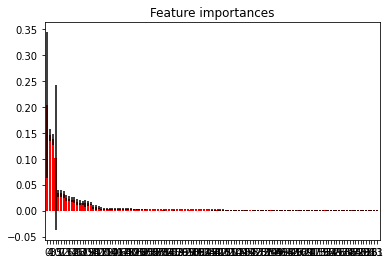

In [61]:
importances = r2.feature_importances_
std = np.std([tree.feature_importances_ for tree in r2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_dum.shape[1]):
    print("{}. {} ({})".format(f + 1, X_train_dum.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_dum.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_dum.shape[1]), indices)
plt.xlim([-1, X_train_dum.shape[1]])
plt.show()

In [ ]:
r2 = r2.fit(X_train_dum,y_train_log)
ypred = r2.predict(X_test_dum)
ypred_original=np.exp(ypred) - 1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

r2 = r2.fit(X_train_freq,y_train_log)
ypred = r2.predict(X_test_freq)
ypred_original=np.exp(ypred) - 1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

r2 = r2.fit(X_train1,y_train_log)
ypred = r2.predict(X_test1)
ypred_original=np.exp(ypred) - 1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error( y_test, ypred_original))





2.8985061481720966
2.93924191599428
2.928552139266137


In [ ]:
r2 = r2.fit(X_train1,y_train1)
ypred = r2.predict(X_test1)
ypred_original=scale_y.inverse_transform(ypred.reshape(-1, 1)).ravel()
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error( y_test, ypred_original))


7.543735710603255


In [ ]:
  models=[LinearRegression(),
          KNeighborsRegressor(),
          SVR(),
          Ridge(),
          Lasso(),
          MLPRegressor(hidden_layer_sizes=(6, 4, 2,2),  activation='relu', solver='lbfgs', alpha=200, batch_size='auto',learning_rate='adaptive', learning_rate_init=0.0001, power_t=0.8, max_iter=5000, shuffle=True,random_state=67, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,early_stopping=True,beta_1=0.9, beta_2=0.9, epsilon=1e-08),
          DecisionTreeRegressor(),
          ExtraTreeRegressor(),
          RandomForestRegressor(n_estimators=100),
          AdaBoostRegressor(),
          GradientBoostingRegressor(),
          BaggingRegressor(n_estimators=100) ,
          XGBRegressor()
          ]
  models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging',]
  score_adapt=[]
  for name,model in zip(models_str,models):

    try:
          print('---------------------------------')
          #if name in ['LinearRegression','Ridge','ExtraTree']:   
          print('start：'+name+' log dummy')
          model=model
          model.fit(X_train_dum,y_train_log)
          y_pred_log=model.predict(X_test_dum)   
          ypred_original=np.exp(y_pred_log) - 1 
          ypred_original = np.around(np.maximum(ypred_original, 0))
          score=model.score(X_test_dum,y_test_log)
          score_adapt.append(str(score)[:5])
          print(name +' msle:',mean_squared_log_error(y_test, ypred_original))
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    try:
          print('---------------------------------')  
          #elif name in ['SVR','MLPRegressor','Bagging','AdaBoost','KNNRegressor']:
          print('start：'+name+' standarnize')
              
          model.fit(X_train1,y_train_log)
          y_pred1=model.predict(X_test1)
          ypred_original=np.exp(y_pred1) - 1 
          #ypred_original=scale_y.inverse_transform(y_pred1.reshape(-1, 1)).ravel()
          ypred_original = np.around(np.maximum(ypred_original, 0))
          score=model.score(X_test1,y_test1)
          score_adapt.append(str(score)[:5])       
          
          print(name +' msle:',(mean_squared_log_error(y_test, ypred_original)))

    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    try:  
          print('---------------------------------')      
          print('start:'+name+' frequency')
         
          model.fit(X_train_freq,y_train_log)
          y_pred_log=model.predict(X_test_freq)
          ypred_original=np.exp(y_pred_log) - 1 
          ypred_original = np.around(np.maximum(ypred_original, 0))
          score_adapt.append(str(score)[:5])    
          print(name +' msle:'+str(mean_squared_log_error(y_test, ypred_original)))

         
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    try:    
          print('---------------------------------') 
          print('start: '+name+' normal')
         
          model.fit(X_train,y_train)
          y_pred = model.predict(X_test)
          y_pred = np.around(np.maximum(y_pred, 0))
          score=model.score(X_test,y_test)
          score_adapt.append(str(score)[:5])   
          print(name +' msle:'+str(mean_squared_log_error(y_test, y_pred)))

          print('---------------------------------')
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))

---------------------------------
开始训练模型：LinearRegression 平滑处理
LinearRegression msle: 4.321707676131373
---------------------------------
开始训练模型：LinearRegression 标准化处理
LinearRegression msle: 3.369062503187477
---------------------------------
开始训练模型：LinearRegression 频率
LinearRegression msle:4.377363558351759
---------------------------------
开始训练模型：LinearRegression 普通
LinearRegression msle:8.443293454575027
---------------------------------
---------------------------------
开始训练模型：KNNRegressor 平滑处理
KNNRegressor msle: 7.669295586931648
---------------------------------
开始训练模型：KNNRegressor 标准化处理
KNNRegressor msle: 3.5620427467374345
---------------------------------
开始训练模型：KNNRegressor 频率
KNNRegressor msle:5.351600474683002
---------------------------------
开始训练模型：KNNRegressor 普通
KNNRegressor msle:9.074183010634629
---------------------------------
---------------------------------
开始训练模型：SVR 平滑处理
SVR msle: 6.457883579750597
---------------------------------
开始训练模型：SVR 标准化处理
SVR msle: 3.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.60608e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.12361e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.91151e-19): result may not be accurate.
  overwrite_a=True).T


MLPRegressor msle: 6.388021776284736
---------------------------------
开始训练模型：MLPRegressor 标准化处理
MLPRegressor msle: 3.272626254310686
---------------------------------
开始训练模型：MLPRegressor 频率
MLPRegressor msle:6.410629637453731
---------------------------------
开始训练模型：MLPRegressor 普通
MLPRegressor msle:9.966373605038251
---------------------------------
---------------------------------
开始训练模型：DecisionTree 平滑处理
DecisionTree msle: 5.176579374897448
---------------------------------
开始训练模型：DecisionTree 标准化处理
DecisionTree msle: 5.25073562371081
---------------------------------
开始训练模型：DecisionTree 频率
DecisionTree msle:5.208540459786922
---------------------------------
开始训练模型：DecisionTree 普通
DecisionTree msle:6.243070538857801
---------------------------------
---------------------------------
开始训练模型：ExtraTree 平滑处理
ExtraTree msle: 7.03765829352012
---------------------------------
开始训练模型：ExtraTree 标准化处理
ExtraTree msle: 6.176779826667041
---------------------------------
开始训练模型：ExtraTree 频率


In [62]:
gdboost = GradientBoostingRegressor(random_state=76, n_estimators=150) #loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')

gdboost = gdboost.fit(X_train_dum,y_train)
ypred = gdboost.predict(X_test_dum)

ypred_original=10**ypred - 1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

2.7926107739664365


In [63]:
xgb_model = xgb.XGBRegressor(learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=80)
xgb_model.fit(X_train_dum,y_train)
ypred = xgb_model.predict(X_test_dum)

ypred_original=10**ypred - 1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

NameError: ignored

In [75]:
x_dum

,url_len,offset_given,log_num_followers,log_num_people_following,log_num_status_updates,log_num_direct_messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,profile_colors,user_name_len,url_given,profile_customized,days_since_profile_creation,profile_clicks_per_visitor,visits_duration_per_visitor,log_daily_profile_clicks,log_daily_visits_duration,log_profile_clicks,log_visits_duration,Profile Cover Image Status_Not set,Profile Cover Image Status_Set,Profile Cover Image Status_unknown,Profile Verification Status_Not verified,Profile Verification Status_Pending,Profile Verification Status_Verified,Profile Text Color_000000,Profile Text Color_0084b4,Profile Text Color_009999,Profile Text Color_0099b9,Profile Text Color_1b95e0,Profile Text Color_1da1f2,Profile Text Color_2fc2ef,Profile Text Color_3b94d9,Profile Text Color_4a913c,Profile Text Color_990000,Profile Text Color_abb8c2,Profile Text Color_cc3366,Profile Text Color_dd2e44,Profile Text Color_e81c4f,Profile Text Color_ff0000,...,User Language_other,User Language_pt,User Language_ru,User Language_tr,Profile Category_business,Profile Category_celebrity,Profile Category_government,Profile Category_unknown,User Time Zone_Alaska,User Time Zone_Amsterdam,User Time Zone_Arizona,User Time Zone_Athens,User Time Zone_Atlantic Time (Canada),User Time Zone_Berlin,User Time Zone_Bern,User Time Zone_Bogota,User Time Zone_Brasilia,User Time Zone_Buenos Aires,User Time Zone_Caracas,User Time Zone_Central Time (US & Canada),User Time Zone_Eastern Time (US & Canada),User Time Zone_Greenland,User Time Zone_Hawaii,User Time Zone_Istanbul,User Time Zone_Jakarta,User Time Zone_London,User Time Zone_Madrid,User Time Zone_Mexico City,User Time Zone_Mountain Time (US & Canada),User Time Zone_Mumbai,User Time Zone_New Delhi,User Time Zone_Pacific Time (US & Canada),User Time Zone_Paris,User Time Zone_Quito,User Time Zone_Riyadh,User Time Zone_Rome,User Time Zone_Santiago,User Time Zone_Tokyo,User Time Zone_other,User Time Zone_unknown
0,0,1.0,4.981202,3.632457,4.488692,2.941511,14.792,1.5761,1,11,0.0,0.0,4386.0,6912.7746,64877.712,5.178784,6.151225,8.820850,9.793293,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0.0,6.008066,2.462398,3.911211,2.463893,8.183,11.2782,1,12,0.0,0.0,3972.0,44797.0104,32502.876,7.060306,6.920979,10.659315,10.519988,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1.0,4.128561,3.273464,3.672005,2.357935,31.823,0.5725,2,6,0.0,0.0,4077.0,2334.0825,129742.371,3.886360,5.631271,7.496645,9.241610,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27,1.0,5.530416,3.060320,4.726050,3.605951,23.052,4.0265,1,7,1.0,0.0,4302.0,17322.0030,99169.704,6.135343,6.893124,9.769013,10.526794,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27,1.0,3.964542,1.973128,3.514813,2.117271,8.418,3.9229,2,10,1.0,0.0,4262.0,16719.3998,35877.516,4.558115,4.889710,8.187716,8.519318,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,1.0,3.784403,1.886491,2.993877,1.755875,24.792,8.1106,3,15,0.0,0.0,3602.0,29214.3812,89300.784,4.693394,5.178646,8.249929,8.735187,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7496,0,1.0,5.447454,4.586644,4.314983,2.238046,26.006,0.8956,2,11,0.0,0.0,3547.0,

In [ ]:
np.sqrt(2.8137)

1.6774087158471545

In [76]:
x_dum = pd.get_dummies(x_log)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import KFold


# Set the parameters by cross-validation
tuned_parameters = [{
  'loss': ['ls'],
  'n_estimators':[100, 150, 200],
  'max_features':['auto']}]
def rmsle(y_test, y_pred):
    y_pred = np.around(np.maximum(10**y_pred - 1, 0))
    y_test = np.around(np.maximum(10**y_test - 1, 0))
    return np.sqrt(mean_squared_log_error(y_test, y_pred))
    
metric = make_scorer(rmsle, greater_is_better=False)

cv_strategy = KFold(n_splits=5, shuffle=True)
gdboost = GradientBoostingRegressor(random_state=76)
grid_search = GridSearchCV(
    gdboost, tuned_parameters, scoring=metric, cv=cv_strategy
)
grid_search.fit(x_dum, y);
print('Finished!')

Finished!


In [88]:
dataplot =pd.DataFrame(x_dum)
dataplot['log_num_likes'] = y

sns.histplot(x='log_num_likes',data= dataplot, hue='Location Public Visibility' , multiple="dodge")

ValueError: ignored

In [67]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print(grid_search.best_score_)

Best parameters set found on development set:

{'loss': 'ls', 'max_features': 'auto', 'n_estimators': 150}
-1.7218176764105977


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
param_dist = {'max_depth': [3],
              'min_child_weight':[3],
              'learning_rate': [0.08,0.085,0.075],
              "n_estimators": [165,170,185],
              'booster': ['gbtree'],}
    
metric = make_scorer(rmsle, greater_is_better=False)

cv_strategy = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(
    xgb_model, param_dist, scoring=metric, cv=cv_strategy
)
grid_search.fit(x_dum, y);
print('Finished!')

In [79]:
y

0       3.449633
1       3.094471
2       3.193125
3       3.802295
4       3.033021
          ...   
7495    3.137987
7496    3.148603
7497    3.092018
7498    3.043755
7499    2.575188
Name: log_num_likes, Length: 7500, dtype: float64

In [70]:
gdboost_best = grid_search.best_estimator_
test_dum =  pd.get_dummies(test_df_p[cols_x_log])

predict_test = gdboost_best.predict(test_dum)
ypred_original=10**predict_test - 1
predict = np.around(np.maximum(ypred_original, 0))

In [71]:
xgb_best = xgb.XGBRegressor(learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=80)
xgb_best.fit(x_dum,y)
predict_test = xgb_best.predict(test_dum)
ypred_original=10**predict_test - 1
predict = np.around(np.maximum(ypred_original, 0))

[21:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
predict

array([4256., 1895.,  358., ..., 4221., 1141.,  194.], dtype=float32)

In [ ]:
# Get indexes
out = pd.DataFrame(test_df['Id'])

# Make predictions
out['Predicted'] = predict # TODO: real predictions

In [ ]:
# Save output
out.to_csv('C://Users//jfrpo//OneDrive//Escritorio//UdeM//IFT6758 - Data Science//IFT6758_Data_Science//IFT6758_Data_Science//kaggle//predictions_8.csv', index=False)

----------------------------------------------------------------------